<a href="https://colab.research.google.com/github/AlexGerwer/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [30]:
# Step 1 - find the actual file to download
# On github, navigate to the diabetes data file and then click the "raw" button to display the file itself. 
# Use the URL at the top of the page in read_csv()
diabetes_data_url = 'https://raw.githubusercontent.com/AlexGerwer/datasets/master/diabetes.csv'
# The dataset is printed out for review
!curl https://raw.githubusercontent.com/AlexGerwer/datasets/master/diabetes.csv

# Step 2 - load the data
import pandas as pd
diabetes_data = pd.read_csv(diabetes_data_url)
print ('\n')

# Step 3 - inspect the loaded file
pd.set_option('display.max_columns', None)
print (diabetes_data.head(20), '\n')

# Step 4 - assess the loaded file for characteristics and missing (NaN) data
diabetes_data_shape = diabetes_data.shape
print ('Diabetes Data Shape')
print (diabetes_data_shape, '\n')
print (diabetes_data.count(), '\n')
print (diabetes_data.isna().sum(), '\n')


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38,0.537,34,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,100,0,0,0,30,0.484,32,1
0,118,84,47,230,45.8,0.551,31,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,196,90,0,0,39.8,0.451,41,1
9,119,80,35,0,29,0.263,29,1
11,143,94,33,146,36.6,0.254,51,1
10,125,70,26,115,31.1,0.205,41,1
7,147,76,0,0,39.4,0.257,43,1
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,57,0
5,117,92,0,0,34.1,0.337,38,0
5,10

## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [51]:
# Adult data file has been downloaded from UC Irvine Machine Learning Repository to my computer
# I have loaded the file from my computer to my Google Drive

# Step I:  Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null 
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Step II:  Generate auth tokens for Colab
from google.colab import auth 
auth.authenticate_user()
  
# Step III:  Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials 
creds = GoogleCredentials.get_application_default()
import getpass 
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass() 
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
  
# Step IV:  Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive
  
# Step V: Print the Google Drive directory
print ('Files in Drive:')
!ls drive/

# Step VI:  Import the file into Colab
import numpy as np
dataset = np.load('adult.data', encoding='bytes')

# from google.colab import files
# adult_data = files.upload()

E: Package 'python-software-properties' has no installation candidate
··········

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
Files in Drive:
'02_23_16_PerformanceEval2015 (8124a20d).zip'
 02_23_16_PerformanceEval2015.zip
 1.GoogleServicesFramework.apk
 2017-12-18.zip
 2.SetupWizard.apk
 3.GoogleLoginService.apk
 adult.data
 ADUsales.zip
 Anniversary2017.mp4
 Anniversary2017.ppsx
 Anniversary2017.ppsx.desktop
 ATTrpt.pdf
'[Blandine_Calais-Germain]_Anatomy_of_Movement(BookFi).pdf'
 CleanComputer.zip
'Colab Notebooks'
 DirProgClientExperience.docx
 DSC_0101.JPG
 DSC_0102.JPG
 DSC_0103.JPG
 DSC_0104.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0108.JPG
 DSC_0131.JPG
 DSC_0134.JPG
 DSC_0193.JPG
 DSC_0194.JPG
 DSC_0195.JPG
 DSC_0196.JPG
 DSC_0198.JPG
 DSC_0199.JPG
 DSC_0200.JPG
 DSC_0201.JPG
 en_project_professional_2013_x86_1123807.exe
'Gerwer, Alex - 237319 - Interview Schedule.pdf'
 high-technology_diagnostic_imaging__htdi_.html

MessageError: ignored

## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0
8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0
7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0
6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0
6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0
6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0
6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0
5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0
8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0
6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0
6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0,0
6,4,sep,tue,91,12

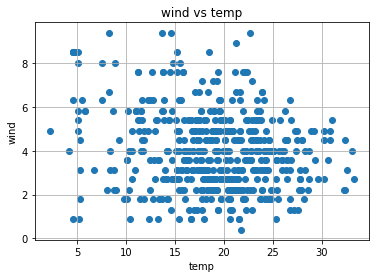

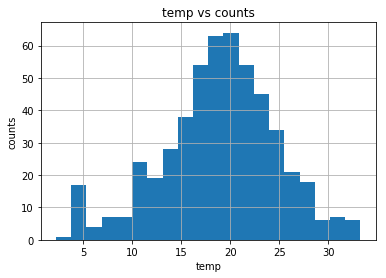

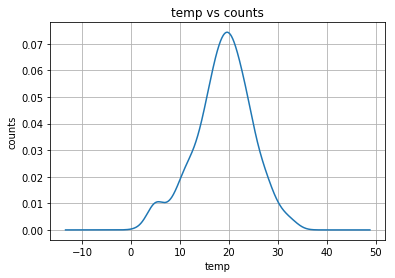

In [63]:
# The dataset is printed out for review
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
print ('\n')

# Retrieve data from UCI repository
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
forestfire_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
forestfire_data = pd.read_csv(forestfire_data_url)
forestfire_data.head()

# The loaded file is inpected
pd.set_option('display.max_columns', None)
print (forestfire_data.head(20), '\n')

# Step 4 - assess the loaded file for characteristics and missing (NaN) data
forestfire_data_shape = forestfire_data.shape
print ('Forest Fire Data Shape')
print (forestfire_data_shape, '\n')
print (forestfire_data.count(), '\n')
print (forestfire_data.isna().sum(), '\n')

#Look at relationships on a scatterplot
import matplotlib.pyplot as plt
# Generare a scatter plot of temp versus wind results
plt.scatter (forestfire_data.temp,forestfire_data.wind)
plt.xlabel('temp')
plt.ylabel('wind')
plt.title('wind vs temp')
plt.grid(True)
plt.show();

#Histogram plot of temperature
forestfire_data['temp'].hist(bins=20)
plt.xlabel('temp')
plt.ylabel('counts')
plt.title('temp vs counts')
plt.grid(True)
plt.show();

# Denisty plot of temperature
forestfire_data['temp'].plot.density()
plt.xlabel('temp')
plt.ylabel('counts')
plt.title('temp vs counts')
plt.grid(True)
plt.show();

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.